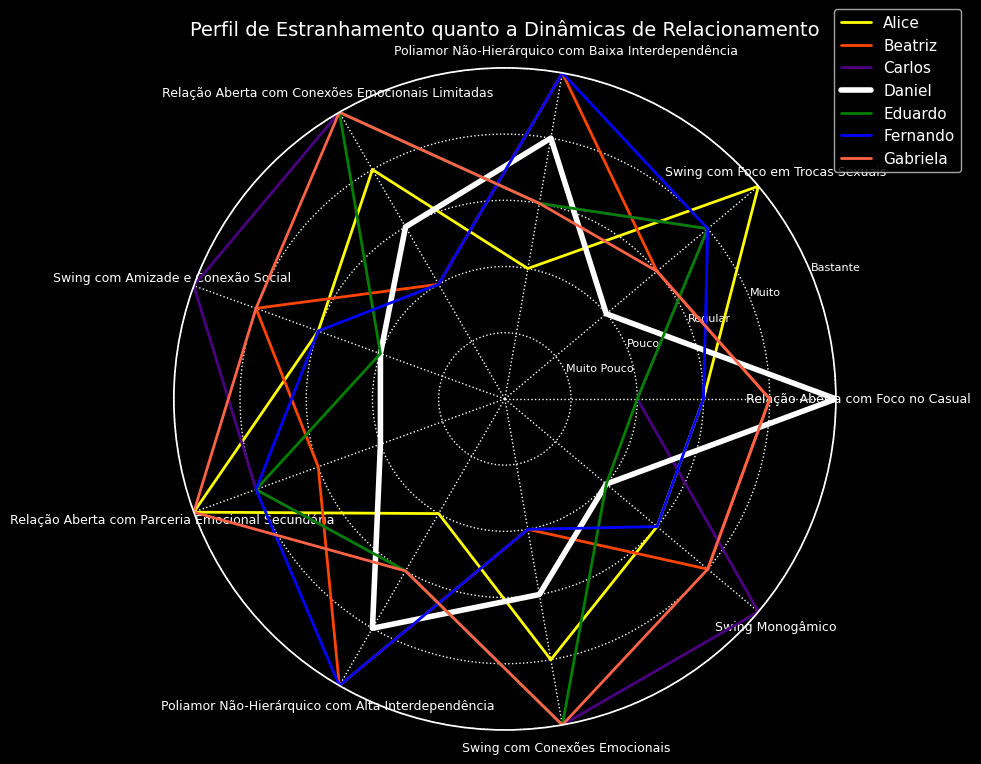

In [30]:
from math import pi
import matplotlib.pyplot as plt
import pandas as pd

# Dados dos participantes e suas preferências
data = {
    'Participante': ['Alice', 'Beatriz', 'Carlos', 'Daniel', 'Eduardo', 'Fernando', 'Gabriela'],
    'Relação Aberta com Foco no Casual': [3, 4, 2, 5, 2, 3, 4],
    'Swing com Foco em Trocas Sexuais': [5, 3, 4, 2, 4, 4, 3],
    'Poliamor Não-Hierárquico com Baixa Interdependência': [2, 5, 3, 4, 3, 5, 3],
    'Relação Aberta com Conexões Emocionais Limitadas': [4, 2, 5, 3, 5, 2, 5],
    'Swing com Amizade e Conexão Social': [3, 4, 5, 2, 2, 3, 4],
    'Relação Aberta com Parceria Emocional Secundária': [5, 3, 4, 2, 4, 4, 5],
    'Poliamor Não-Hierárquico com Alta Interdependência': [2, 5, 3, 4, 3, 5, 3],
    'Swing com Conexões Emocionais': [4, 2, 5, 3, 5, 2, 5],
    'Swing Monogâmico': [3, 4, 5, 2, 2, 3, 4]
}

# Converte os dados para um DataFrame
df = pd.DataFrame(data)

# Definindo as categorias
categories = list(df.columns[1:])
N = len(categories)

# Configurações do gráfico polar
plt.figure(figsize=(10, 10), facecolor='black')
ax = plt.subplot(111, polar=True)

# Configurações dos eixos e ângulos
plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories, color='white', fontsize=9)
ax.yaxis.grid(True, color='white', linestyle=':', linewidth=1)
ax.xaxis.grid(True, color='white', linestyle=':', linewidth=1)
ax.set_rscale('linear')
plt.yticks([1, 2, 3, 4, 5], ["Muito Pouco", "Pouco", "Regular", "Muito", "Bastante"], color="white", size=8)
ax.set_ylim(0, 5)

# Cores dos participantes
male_colors = ['#4B0082', '#008000', '#0000FF']  # Roxo, Verde, Azul
female_colors = ['#FFFF00', '#FF4500', '#FF6347']  # Amarelo, Laranja, Vermelho

# Nome da pessoa central
center_person = 'Daniel'

# Loop para plotar os dados de cada participante
for i, participant in enumerate(df['Participante']):
    if participant == center_person:
        color = 'white'  # Cor branca para Daniel
        linewidth = 4
    elif participant in ['Carlos', 'Eduardo', 'Fernando']:
        # Homens recebem as cores roxo, verde e azul
        color = male_colors[['Carlos', 'Eduardo', 'Fernando'].index(participant)]
        linewidth = 2
    elif participant in ['Alice', 'Beatriz', 'Gabriela']:
        # Mulheres recebem as cores amarelo, laranja e vermelho
        color = female_colors[['Alice', 'Beatriz', 'Gabriela'].index(participant)]
        linewidth = 2
    else:
        color = 'gray'  # Caso não seja definido, cor padrão cinza
        linewidth = 2

    # Obtendo os valores do participante
    values = df[df['Participante'] == participant].drop(columns='Participante').values.flatten().tolist()
    values += values[:1]  # Para fechar o gráfico

    # Calculando os ângulos para o gráfico polar
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Para fechar o gráfico

    # Plota o gráfico polar para o participante
    plt.polar(angles, values, color=color, linewidth=linewidth, linestyle='solid')

# Título do gráfico
plt.title('Perfil de Estranhamento quanto a Dinâmicas de Relacionamento', color='white', fontsize=14)

# Legenda dos participantes
legend = plt.legend(df['Participante'].tolist(), loc='upper right', bbox_to_anchor=(1.2, 1.1), facecolor='black', labelcolor='white')
legend.get_title().set_color("white")

# Ajuste final no layout
plt.tight_layout()

# Exibe o gráfico
plt.show()